<a href="https://colab.research.google.com/github/ImPrateekParashar/Cureya/blob/main/Apple_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [79]:
#Get the stock quote
data= pd.read_csv('/content/drive/MyDrive/Cureya/AAPL.csv')
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...,...
1997,2019-12-10,67.150002,67.517502,66.464996,67.120003,66.234108,90420400
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799057,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.879601,133587600


In [80]:
print(data.columns.values)

['Date' 'Open' 'High' 'Low' 'Close' 'Adj Close' 'Volume']


In [81]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2.002000e+03
mean,31.500624,31.779222,31.219423,31.508181,29.503553,2.384896e+08
std,12.371571,12.480324,12.281628,12.392939,12.768425,1.875819e+08
min,13.856071,14.271429,13.753571,13.947500,12.152316,4.544800e+07
25%,21.439375,21.659821,21.228661,21.480357,18.618484,1.104136e+08
50%,28.193751,28.501249,27.911250,28.225000,26.087562,1.748130e+08
75%,40.946876,41.413124,40.448124,40.966875,39.167153,2.994964e+08
max,69.250000,70.197502,69.245003,69.964996,69.041557,1.506120e+09


2) Visualise some of the attributes of the dataset.


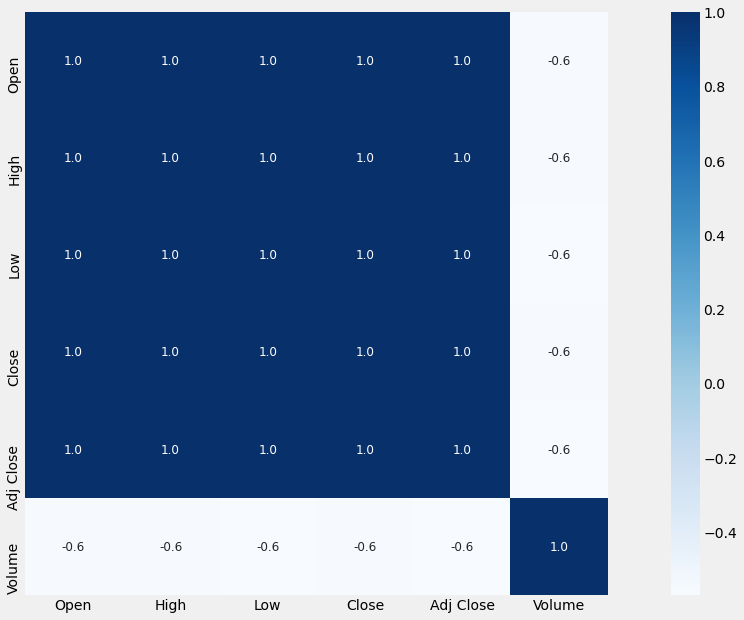

In [82]:
corr = data.corr()
corr.shape

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

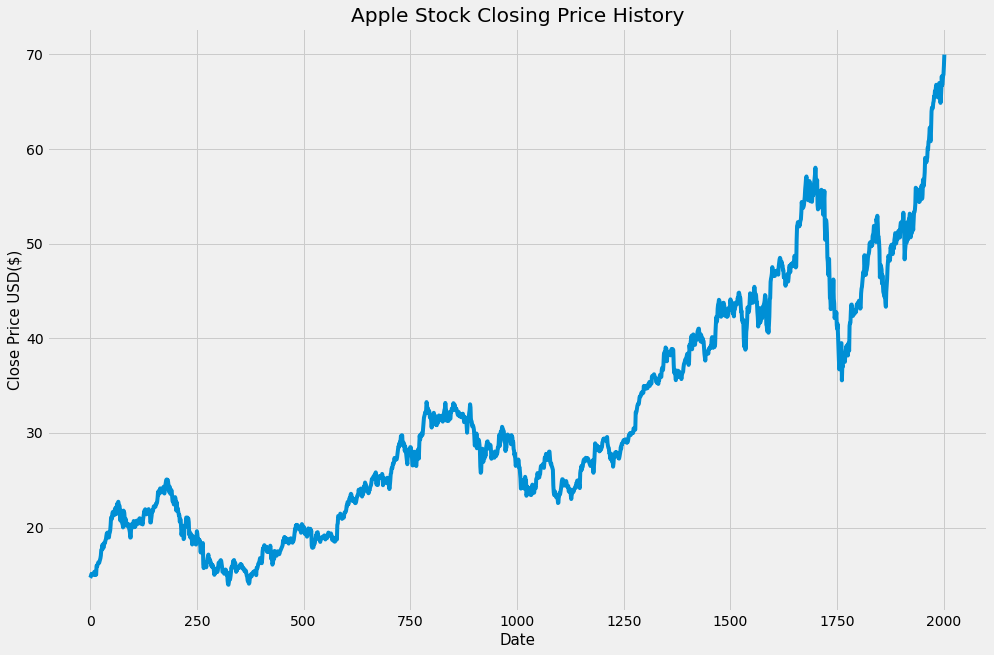

In [83]:
plt.figure(figsize=(15,10))
plt.title('Apple Stock Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD($)',fontsize=15)
plt.show()

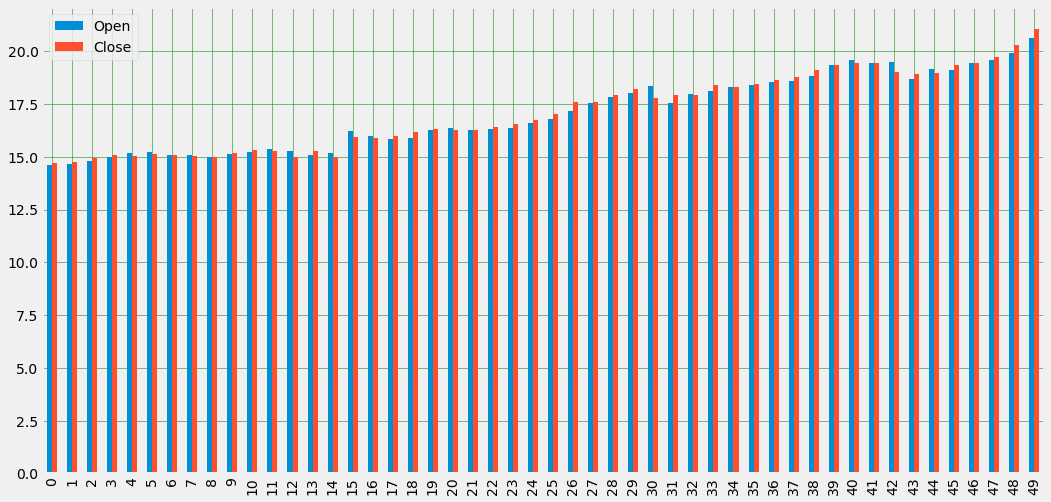

In [84]:
# Plot Open vs Close (Year 2012)
data[['Open','Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

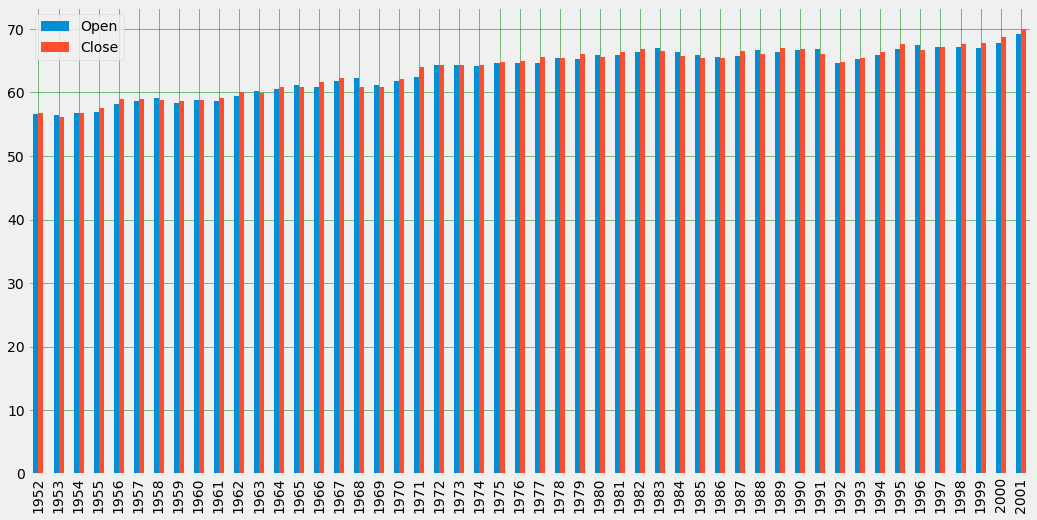

In [85]:
# Plot Open vs Close (Year 2019)
data[['Open','Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

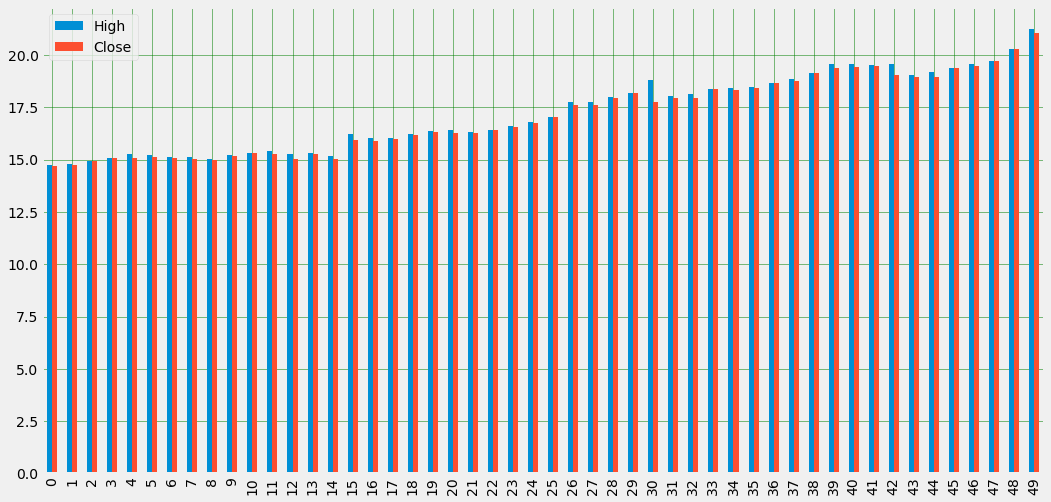

In [86]:
# Plot High vs Close (Year 2012)
data[['High','Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()

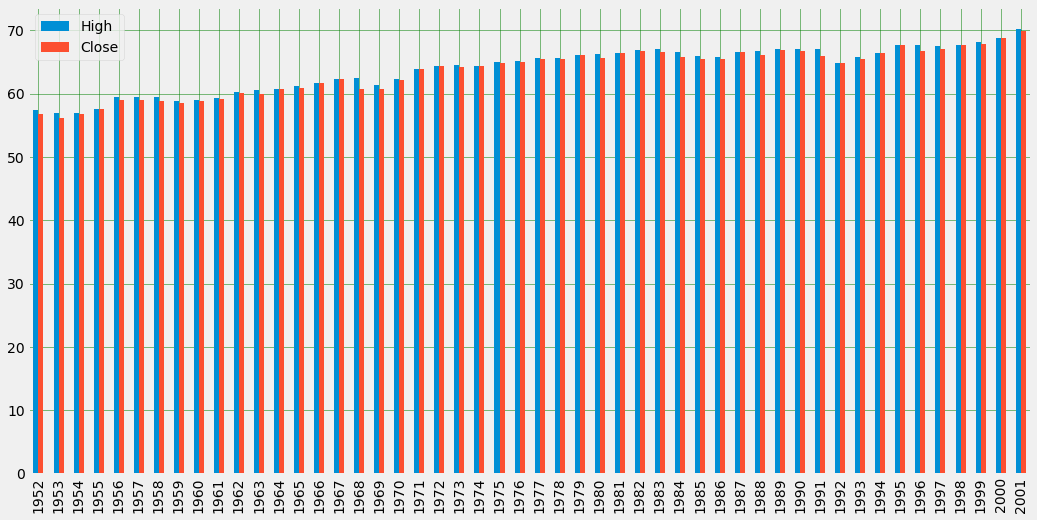

In [87]:
# Plot High vs Close (Year 2019)
data[['High','Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

4) Write the observations you have made during the analysis in a
Markdown Cell.


1. There is no null values present in the dataset.


5) Split your whole dataset between training and testing dataset.

In [88]:
data1 = data.filter(['Close'])
dataset = data1.values
len(dataset)

2002

In [89]:
#Create a new dataframe with only the 'Close Column'
data1=data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset= data1.values
#Get the numberof rows to train the model on
training_data_len= math.ceil(len(dataset)* .8)

training_data_len

1602

In [90]:
print(dataset)

[[14.686786]
 [14.765714]
 [14.929643]
 ...
 [67.864998]
 [68.787498]
 [69.964996]]


In [91]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
print(scaled_data.shape)
print(scaled_data)

(2002, 1)
[[0.01319741]
 [0.0146064 ]
 [0.01753279]
 ...
 [0.96251175]
 [0.97897982]
 [1.        ]]


Splitting the dataset into training and testing data.

In [92]:
training_data= scaled_data[0:data_train, :]
print(len(training_data))
x_train, y_train = [], []

for i in range(100, len(training_data)):
  x_train.append(training_data[i-100:i, 0])
  y_train.append(training_data[i,0])
  if i<=101:
    print(x_train)
    print(y_train)

1602
[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01898003, 0.02351306, 0.01905017,
       0.03578602, 0.03449178, 0.0361813 , 0.03983448, 0.04204679,
       0.04186192, 0.04117974, 0.04408699, 0.04682209, 0.04992064,
       0.05492545, 0.06543873, 0.06559813, 0.07145091, 0.07582452,
       0.06830777, 0.07120224, 0.07114488, 0.07926097, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.09236911, 0.0968511 ,
       0.09814534, 0.09859803, 0.09093463, 0.08908568, 0.08935985,
       0.09656424, 0.09859166, 0.10294618, 0.11321081, 0.12690551,
       0.12434253, 0.1243489 , 0.13425015, 0.1373487 , 0.13514272,
       0.13312807, 0.13103049, 0.13799896, 0.14278066, 0.14478259,
       0.13983513, 0.13326194, 0.14542651, 0.15224197, 0.14904781,
       0.15502175, 0.15664749, 0.15168093, 0.15025281, 0.14806597,
       0.13688323, 0.12088061, 0.13973313, 0.13886606, 0

In [93]:
testing_data = scaled_data[data_train: , :]
print(len(testing_data))
x_test, y_test = [], []

for i in range(100, len(testing_data)):
  x_test.append(testing_data[i-100:i, 0])
  y_test.append(training_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

400
[array([0.59084215, 0.58553137, 0.58249657, 0.58838762, 0.58629006,
       0.59164551, 0.59070827, 0.59262735, 0.58959254, 0.58780742,
       0.58499578, 0.60003576, 0.60713174, 0.6137368 , 0.61672694,
       0.61440629, 0.60655155, 0.60445399, 0.60914004, 0.60208866,
       0.60253498, 0.59378768, 0.59334143, 0.57972961, 0.58334453,
       0.57870316, 0.57629316, 0.56402021, 0.57410631, 0.57290138,
       0.57888164, 0.57714111, 0.58637926, 0.57183027, 0.57843532,
       0.58990498, 0.60155313, 0.6005267 , 0.58950334, 0.60356143,
       0.6049003 , 0.6030259 , 0.60543583, 0.60074977, 0.60735491,
       0.60539123, 0.60614991, 0.61235333, 0.62047582, 0.61775346,
       0.60333827, 0.59856301, 0.60025885, 0.6502879 , 0.67657433,
       0.67925209, 0.68407203, 0.67532472, 0.67594953, 0.68322406,
       0.67719914, 0.68317939, 0.68710676, 0.68929359, 0.70303931,
       0.7220512 , 0.7125899 , 0.71071542, 0.7107601 , 0.71272377,
       0.71571391, 0.72365786, 0.73151251, 0.74615079, 0.

In [94]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(1502, 100, 1) (1502,)


In [95]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


6) Predict the stock prices using the following algorithms:
1. RNN



In [96]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [97]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
lstm_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=80, verbose=1)

Epoch 1/80
24/24 [==============================] - 11s 246ms/step - loss: 0.0148 - val_loss: 0.3666
Epoch 2/80
24/24 [==============================] - 5s 196ms/step - loss: 0.0012 - val_loss: 0.3441
Epoch 3/80
24/24 [==============================] - 5s 193ms/step - loss: 5.1484e-04 - val_loss: 0.3492
Epoch 4/80
24/24 [==============================] - 5s 197ms/step - loss: 4.7613e-04 - val_loss: 0.3431
Epoch 5/80
24/24 [==============================] - 5s 194ms/step - loss: 4.6340e-04 - val_loss: 0.3238
Epoch 6/80
24/24 [==============================] - 5s 195ms/step - loss: 4.5604e-04 - val_loss: 0.3485
Epoch 7/80
24/24 [==============================] - 5s 196ms/step - loss: 4.5099e-04 - val_loss: 0.3368
Epoch 8/80
24/24 [==============================] - 5s 197ms/step - loss: 4.5604e-04 - val_loss: 0.3267
Epoch 9/80
24/24 [==============================] - 5s 196ms/step - loss: 4.4146e-04 - val_loss: 0.3308
Epoch 10/80
24/24 [==============================] - 5s 196ms/step - lo

7) Print your model's accuracy on training and testing datasets.

In [102]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [103]:
train_predictions = sc.inverse_transform(train_predictions)
test_predictions = sc.inverse_transform(test_predictions)

In [106]:
print(train_predictions.shape, test_predictions.shape)

(1502, 1) (300, 1)


8) plot graph after prediction by using different colors to show predicted
stocks.


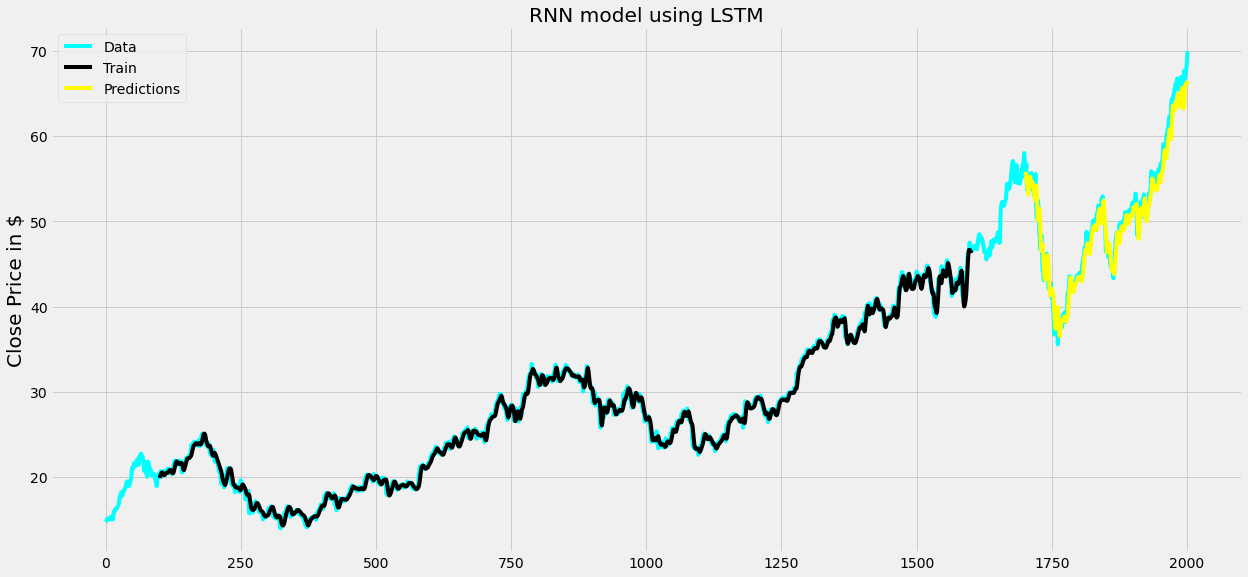

In [121]:
# train predictions
train_prediction_plot = np.empty_like(dataset)
train_prediction_plot[:, :] = np.nan
train_prediction_plot[100:len(train_predictions)+100, :] = train_predictions

# test predictions
test_prediction_plot = np.empty_like(dataset)
test_prediction_plot[:] = np.nan
test_prediction_plot[len(train_predictions)+(100*2):len(dataset), :] = test_predictions

plt.figure(figsize = (19,9))
plt.title('RNN model using LSTM')
plt.ylabel('Close Price in $', fontsize = 20)

plt.plot(dataset,color='cyan')
plt.plot(train_prediction_plot,color='black')
plt.plot(test_prediction_plot,color='yellow')
plt.legend(['Data', 'Train', 'Predictions'], loc='upper left')
plt.show()

9) Add an Evaluation Metrics(any of your choice)

In [111]:
math.sqrt(mean_squared_error(y_train,train_predictions))

28.02790354345522

In [112]:
math.sqrt(mean_squared_error(y_test,test_predictions))

50.390506103819085